In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
from sklearn import random_projection
from scipy.linalg import pinv
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
#load data
df = pd.read_csv (r'./data/wine.csv')

#preprocessing
# convert target to binary
df.loc[df.quality =='bad', "quality"] = 0 #bad wine
df.loc[df.quality == 'good', "quality"] = 1 #good wine
#get the target
y = df.pop('quality')
#scale features
X_scaled = preprocessing.scale(df)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [3]:
def convert_numarr_to_df (X_train,labels,features):
    #convert back X_train to df for visulaization
    rows = X_train.shape[0]
    #target = np.reshape(y_train.to_numpy(),(rows,1))
    labels = np.reshape(labels,(rows,1))
    X_train_vis = np.hstack((X_train,labels))
    features.append('class')
    #print(X_train_vis.shape)
    #print(features)
    df_vis = pd.DataFrame(data=X_train_vis,    # values
            #index=data[1:,0],    # 1st column as index
            columns=features)
    return df_vis

In [4]:
clusters = [2,3,4,5,6]
accuracy_list = []
y_train=y_train.astype('int')
params = {'alpha': [0.00001,0.0001,0.001]
          #epochs
          , 'max_iter': [12,15,17,20,23,27]
          , 'hidden_layer_sizes' : [(8,),(10,),(11,),(12,),(14,)]
         }

for cluster in clusters:
    columns = list(df.columns)
    c = KMeans(n_clusters=cluster, random_state=10)
    c_labels = c.fit_predict(X_train)
    df_converted = convert_numarr_to_df(X_train,c_labels,columns)
    hot_encoding = pd.get_dummies(df_converted['class'], prefix='class')
    df_merge = pd.concat([df_converted, hot_encoding], axis=1, sort=False)
    df_merge = df_merge.drop('class', 1)
    X_train_new = df_merge.to_numpy()
    grid_search_cv = GridSearchCV(MLPClassifier(random_state = 42, solver = 'lbfgs')
                              , params
                              , scoring = "accuracy"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
    
    grid_search_cv.fit(X_train_new, y_train)
    cv_accuracy = cross_val_score(grid_search_cv.best_estimator_, X_train_new, y_train, cv=5, scoring='accuracy').mean()
    accuracy_list.append(cv_accuracy)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    3.9s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    8.4s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    5.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    5.1s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    5.3s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    4.8s finished


In [5]:
accuracy_list

[0.76234375,
 0.7615257352941176,
 0.7685692401960784,
 0.759188112745098,
 0.7631004901960784]

In [6]:
accuracy_list

[0.76234375,
 0.7615257352941176,
 0.7685692401960784,
 0.759188112745098,
 0.7631004901960784]

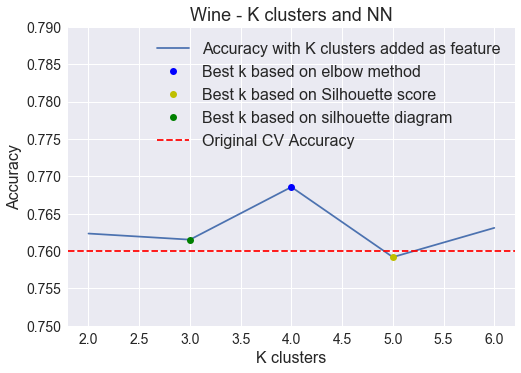

In [7]:
plt.style.use('seaborn')
plt.plot(clusters,accuracy_list, label = 'Accuracy with K clusters added as feature')
plt.xlabel('K clusters', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Wine - K clusters and NN', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylim(0.75,0.79)
plt.plot(4, accuracy_list[2], 'bo', label = 'Best k based on elbow method') 
plt.plot(5, accuracy_list[3], 'yo', label = 'Best k based on Silhouette score') 
plt.plot(3, accuracy_list[1], 'go', label = 'Best k based on silhouette diagram') 
plt.axhline(y=0.76,color='r', linestyle='--', label = 'Original CV Accuracy')
plt.legend(fontsize=16)
plt.show()

In [8]:
clusters = [2,3,4,5,6]
accuracy_list = []
y_train=y_train.astype('int')
params = {'alpha': [0.00001,0.0001,0.001]
          #epochs
          , 'max_iter': [12,15,17,20,23,27]
          , 'hidden_layer_sizes' : [(8,),(10,),(11,),(12,),(14,)]
         }

for cluster in clusters:
    columns = list(df.columns)
    gmm = GaussianMixture(covariance_type = 'full', n_components = cluster, n_init = 10, random_state=1)
    c_labels = gmm.fit_predict(X_train)
    df_converted = convert_numarr_to_df(X_train,c_labels,columns)
    hot_encoding = pd.get_dummies(df_converted['class'], prefix='class')
    df_merge = pd.concat([df_converted, hot_encoding], axis=1, sort=False)
    #print(df_merge.shape)
    df_merge = df_merge.drop('class', 1)
    X_train_new = df_merge.to_numpy()
    grid_search_cv = GridSearchCV(MLPClassifier(random_state = 42, solver = 'lbfgs')
                              , params
                              , scoring = "accuracy"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
    
    grid_search_cv.fit(X_train_new, y_train)
    cv_accuracy = cross_val_score(grid_search_cv.best_estimator_, X_train_new, y_train, cv=5, scoring='accuracy').mean()
    accuracy_list.append(cv_accuracy)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    5.2s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    5.0s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    4.9s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    5.0s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:    4.8s finished


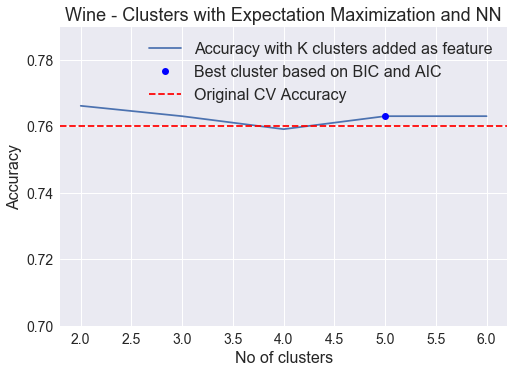

In [9]:
plt.style.use('seaborn')
plt.plot(clusters,accuracy_list, label = 'Accuracy with K clusters added as feature')
plt.xlabel('No of clusters', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Wine - Clusters with Expectation Maximization and NN', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylim(0.70,0.79)
#plt.plot(4, accuracy_list[3], 'bo', label = 'Best k based on elbow method') 
plt.plot(5, accuracy_list[3], 'bo', label = 'Best cluster based on BIC and AIC') 
plt.axhline(y=0.76,color='r', linestyle='--', label = 'Original CV Accuracy')
plt.legend(fontsize=16)
plt.show()